Размер исходных данных: 10, время выполнения: 0.01026 секунд
Размер исходных данных: 50, время выполнения: 0.00544 секунд
Размер исходных данных: 100, время выполнения: 0.01016 секунд
Размер исходных данных: 500, время выполнения: 0.00639 секунд
Размер исходных данных: 1000, время выполнения: 0.01401 секунд
Размер исходных данных: 5000, время выполнения: 0.01885 секунд
Размер исходных данных: 10000, время выполнения: 0.04276 секунд


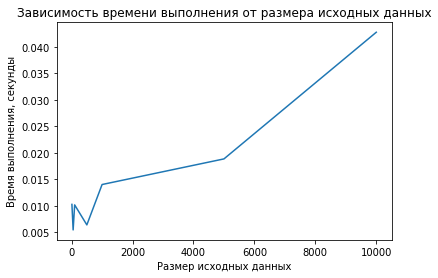

In [3]:
import psycopg2
from time import time
import matplotlib.pyplot as plt

db_params = {'database':"pic", 'user':"danila", 'password':"Ckj;ysq", 'host':"localhost"}

def execute_task(num_records):
    start_time = time()
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()
    cur.execute(f"SELECT * FROM historyData LIMIT {num_records}")
    data = cur.fetchall()
    conn.close()
    end_time = time()

    return end_time - start_time

data_sizes = [10, 50, 100, 500, 1000, 5000, 10000]

execution_times = []

for size in data_sizes:
    execution_time = execute_task(size)
    execution_times.append(execution_time)

    print(f"Размер исходных данных: {size}, время выполнения: {execution_time:.5f} секунд")

plt.plot(data_sizes, execution_times)
plt.xlabel("Размер исходных данных")
plt.ylabel("Время выполнения, секунды")
plt.title("Зависимость времени выполнения от размера исходных данных")
plt.show()




Тестирования скорости стратегий

Стратегия adx работала 5.62 секунд.
Стратегия rsi работала 6.73 секунд.
Стратегия stochastic работала 5.37 секунд.


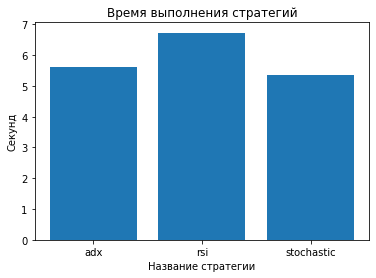

In [4]:
import subprocess
import time

# Функция для запуска стратегии
def run_strategy(strategy_path):
    start_time = time.perf_counter()
    process = subprocess.Popen(['python3', "../" + strategy_path], stdout=subprocess.PIPE)
    output, _ = process.communicate()
    end_time = time.perf_counter()
    duration = round(end_time - start_time, 2)
    print(f"Стратегия {strategy_path[9:-8]} работала {duration} секунд.")
    return duration

conn = psycopg2.connect(**db_params)
cur = conn.cursor()
cur.execute("SELECT strategy_id, path_file, symbol FROM tradeStrategy WHERE status = 'active'")
rows = cur.fetchall()

rows_strategy = list()

for row in rows:
    row_dict = dict()
    row_dict['Id'] = row[0]
    row_dict['Path'] = row[1]
    row_dict['Symbol'] = row[2]
    rows_strategy.append(row_dict)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

strategy_names = [row['Path'][9:-8] for row in rows_strategy]
durations = [run_strategy(row['Path']) for row in rows_strategy]

ax.bar(strategy_names, durations)
ax.set_title("Время выполнения стратегий")
ax.set_xlabel("Название стратегии")
ax.set_ylabel("Секунд")

plt.show()
